Data Source: https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses/r5kz-chrr

In this script I extract liquor stores from a business license dataset and calculate the distance of each crime report from the closest liquor store. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
pd.options.display.max_columns = 1000

In [6]:
# Reading in chicago business licenses file
license_df = pd.read_csv('Business_Licenses.csv')

C:\Users\Anita\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
license_df.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,BUSINESS ACTIVITY ID,BUSINESS ACTIVITY,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,22308-20060816,1723393,29481,1,BELL OIL TERMINAL INC,Bell Oil Terminal LLC,3741 S PULASKI RD 1,CHICAGO,IL,60623,14.0,NaN,14-,8.0,1010,Limited Business License,NaN,NaN,22308.0,RENEW,NaN,06/21/2006,08/10/2006,N,08/16/2006,08/15/2007,08/10/2006,08/11/2006,AAI,NaN,NaN,41.825320,-87.723960,"(41.82531992987547, -87.72395999659746)"
1,1620668-20160516,2455262,295026,1,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,558 W ROOSEVELT RD,CHICAGO,IL,60607,25.0,28.0,25-28,1.0,1010,Limited Business License,911,Retail Sales of Clothing / Accessories / Shoes,1620668.0,RENEW,NaN,03/15/2016,05/18/2016,N,05/16/2016,05/15/2018,05/18/2016,08/30/2016,AAI,NaN,NaN,41.867339,-87.641590,"(41.86733856638269, -87.64159005699716)"
2,2368602-20160616,2460909,291461,3,"PROJECT: VISION , INC.","PROJECT : VISION , INC",2301 S ARCHER AVE 1 1,CHICAGO,IL,60616,25.0,18.0,25-18,9.0,1625,Raffles,720,Not-For-Profit Selling Raffles for Prizes of $...,2368602.0,RENEW,NaN,04/15/2016,06/21/2016,N,06/16/2016,06/15/2017,06/21/2016,06/22/2016,AAC,08/30/2016,NaN,41.850843,-87.638734,"(41.85084294374687, -87.63873424399071)"
3,2060891-20141016,2353257,357247,1,FOLASHADE'S CLEANING SERVICE INC.,FOLASHADE'S CLEANING SERVICE INC.,1965 BERNICE RD 1 1SW,LANSING,IL,60438,NaN,NaN,NaN,NaN,1010,Limited Business License,NaN,NaN,2060891.0,RENEW,NaN,08/15/2014,04/01/2016,N,10/16/2014,10/15/2016,04/01/2016,04/01/2016,AAI,NaN,38.0,41.951316,-87.678586,"(41.95131555606832, -87.67858578019546)"
4,1144216-20070516,1804790,147,63,WALGREEN CO.,Walgreens # 05192,9148 S COMMERCIAL AVE 1ST,CHICAGO,IL,60617,10.0,25.0,10-25,4.0,1010,Limited Business License,NaN,NaN,1144216.0,RENEW,NaN,03/23/2007,05/10/2007,N,05/16/2007,05/15/2008,05/10/2007,05/11/2007,AAI,NaN,5.0,41.728622,-87.551366,"(41.72862173556932, -87.55136646594693)"


In [8]:
license_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954489 entries, 0 to 954488
Data columns (total 34 columns):
ID                                   954489 non-null object
LICENSE ID                           954489 non-null int64
ACCOUNT NUMBER                       954489 non-null int64
SITE NUMBER                          954489 non-null int64
LEGAL NAME                           954485 non-null object
DOING BUSINESS AS NAME               954439 non-null object
ADDRESS                              954489 non-null object
CITY                                 954486 non-null object
STATE                                954477 non-null object
ZIP CODE                             954091 non-null object
WARD                                 884245 non-null float64
PRECINCT                             856124 non-null float64
WARD PRECINCT                        884418 non-null object
POLICE DISTRICT                      861325 non-null float64
LICENSE CODE                         954489 non-n

In [9]:
# Checking null legal names
license_df[(license_df['LEGAL NAME'].isnull())]

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,BUSINESS ACTIVITY ID,BUSINESS ACTIVITY,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
85662,2054727-20140916,2347511,356209,1,NaN,"ENGAGING SCHOOLS, INC.",23 GARDEN ST,CAMBRIDGE,MA,02138,NaN,NaN,NaN,NaN,1010,Limited Business License,NaN,NaN,2054727.0,RENEW,NaN,07/15/2014,09/11/2014,N,09/16/2014,09/15/2016,09/11/2014,09/12/2014,AAI,NaN,NaN,NaN,NaN,NaN
85982,2054727-20100827,2054727,356209,1,NaN,"ENGAGING SCHOOLS, INC.",23 GARDEN ST,CAMBRIDGE,MA,02138,NaN,NaN,NaN,NaN,1010,Limited Business License,NaN,NaN,2054727.0,ISSUE,NaN,08/27/2010,08/27/2010,N,08/27/2010,09/15/2012,08/27/2010,08/27/2010,AAI,NaN,NaN,NaN,NaN,NaN
86058,2054727-20120916,2176737,356209,1,NaN,"ENGAGING SCHOOLS, INC.",23 GARDEN ST,CAMBRIDGE,MA,02138,NaN,NaN,NaN,NaN,1010,Limited Business License,NaN,NaN,2054727.0,RENEW,NaN,07/16/2012,08/22/2012,N,09/16/2012,09/15/2014,08/22/2012,08/23/2012,AAI,NaN,NaN,NaN,NaN,NaN
87212,2054727-20160916,2481571,356209,1,NaN,"ENGAGING SCHOOLS, INC.",23 GARDEN ST,CAMBRIDGE,MA,02138,NaN,NaN,NaN,NaN,1010,Limited Business License,NaN,NaN,2054727.0,RENEW,NaN,07/15/2016,03/03/2017,N,09/16/2016,09/15/2018,03/03/2017,03/07/2017,AAI,NaN,NaN,NaN,NaN,NaN


The licenses with missing legal names do not have anything to do with liquor, so I will drop them. 

In [10]:
# Dropping rows with null legal name
license_df.dropna(subset=['LEGAL NAME'], inplace=True)

In [11]:
# Making all letters capitalized in 'Legal Name'
license_df['LEGAL NAME'] = license_df['LEGAL NAME'].apply(lambda name: name.upper())

In [12]:
# Searching for liquor stores
license_df['LEGAL NAME'][license_df['LEGAL NAME'].str.contains('LIQUOR|SPIRITS|WINE|ALCOHOL')]

555                     FLICKINGER FINE WINE, INC.
1653                         DANNY'S LIQUORS, INC.
1727                     ALTGELD GARDEN LIQUOR INC
1743                         ASHLAND LIQUORS, INC.
2401                 GREEN OAK FOOD & LIQUOR, INC.
2827                   LATIN GROCERY & LIQUOR, INC
4170                    LAKE & WELLS FOOD & LIQUOR
6436                       ALIZE FOOD & LIQUOR INC
8193                            AIDA FOOD & LIQUOR
9080                            4424 LIQUORS, INC.
9475                         WHIPPLE LIQUORS, INC.
9654                   1155 N. WELLS LIQUORS, INC.
9783           HOUSTON'S LIQUOR & FOOD STORE, INC.
10618                      DIA FOOD & LIQUOR, INC.
11505                 7901 LIQUORS & GROCERY, INC.
11687                         TONY'S FOOD & LIQUOR
11797                     MR G'S FOOD & LIQUOR INC
12185                    K & C FOOD & LIQUORS INC.
12382              ONE ELEVEN FOOD & LIQUORS, INC.
12520                   ABBASSI

In [13]:
# Creating df of liquor stores
liquor_df = license_df[license_df['LEGAL NAME'].str.contains('LIQUOR|SPIRITS|WINE|ALCOHOL')]

In [14]:
liquor_df.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,BUSINESS ACTIVITY ID,BUSINESS ACTIVITY,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
555,1577539-20060816,1734460,287993,1,"FLICKINGER FINE WINE, INC.",FLICKINGER FINE WINE,1600 S STEWART AVE 5TH & BSMT,CHICAGO,IL,60616,25.0,6.0,25-6,12.0,1010,Limited Business License,NaN,NaN,1577539.0,RENEW,NaN,06/21/2006,07/18/2006,N,08/16/2006,08/15/2007,07/18/2006,07/19/2006,AAI,NaN,NaN,41.859977,-87.637946,"(41.859977210463654, -87.63794616945249)"
1653,1118-20060216,1654809,24160,1,"DANNY'S LIQUORS, INC.",DANNY'S LIQUORS,3018 N MILWAUKEE AVE 1ST,CHICAGO,IL,60618,30.0,25.0,30-25,25.0,1010,Limited Business License,NaN,NaN,1118.0,RENEW,NaN,12/21/2005,02/10/2006,N,02/16/2006,02/15/2007,02/10/2006,02/14/2006,AAI,NaN,NaN,41.935989,-87.718982,"(41.93598865891675, -87.71898231267689)"
1727,32895-20070816,1825750,14600,1,ALTGELD GARDEN LIQUOR INC,ALTGELD GARDEN LIQUOR INC,13118 S ELLIS AVE 1ST,CHICAGO,IL,60827,9.0,42.0,9-42,5.0,1010,Limited Business License,NaN,NaN,32895.0,RENEW,NaN,06/21/2007,08/13/2007,N,08/16/2007,07/15/2008,08/13/2007,08/13/2007,AAI,NaN,NaN,41.656753,-87.597599,"(41.65675265668745, -87.59759858587499)"
1743,21457-20110716,2095696,63338,1,"ASHLAND LIQUORS, INC.",ROTHSCHILD LIQUORS,1532 W CHICAGO AVE 1ST,CHICAGO,IL,60642,1.0,40.0,1-40,12.0,1010,Limited Business License,NaN,NaN,21457.0,RENEW,NaN,05/16/2011,07/08/2011,N,07/16/2011,07/15/2013,07/08/2011,07/11/2011,AAC,08/06/2012,29.0,41.896199,-87.666257,"(41.89619851505597, -87.66625727462089)"
2401,33091-20070216,1774457,8468,1,"GREEN OAK FOOD & LIQUOR, INC.",GREEN OAK FOOD & LIQUOR INC,956 N LARRABEE ST,CHICAGO,IL,60610,27.0,21.0,27-21,18.0,1010,Limited Business License,NaN,NaN,33091.0,RENEW,NaN,12/20/2006,02/13/2007,N,02/16/2007,02/15/2008,02/13/2007,02/13/2007,AAI,NaN,NaN,41.900361,-87.643236,"(41.90036123056518, -87.6432364056876)"


In [16]:
# Checking out the names of the liquor stores
set(liquor_df['LEGAL NAME'])

{"1000 LIQUOR'S, INC.",
 '1155 N. WELLS LIQUORS, INC.',
 '115TH ST FOOD & LIQUORS INC',
 '12 ROTHSCHILD LIQUOR MART, INC.',
 '1208 LIQUORS, INC.',
 '2000 WEST MADISON LIQUOR CORP',
 '2944 WEST 47TH STREET LIQUOR MART, INC.',
 '301 PULASKI FOOD & LIQUOR, INC.',
 '3400 FOOD & LIQUOR INC',
 '4424 LIQUORS, INC.',
 '47TH ST FOOD & LIQUOR INC',
 '4801 CHICAGO PRESTIGE FOOD & LIQUOR, INC.',
 '51ST EXPRESS FOOD & LIQUOR INC',
 '57TH STREET WINES LLC',
 '63RD FOOD & LIQUOR INC.',
 '67TH ONE STOP FOOD & LIQUOR, INC.',
 '71ST & STATE FOOD & LIQUOR, INC.',
 '7400 SOUTH HALSTED FOOD AND LIQUORS, INC.',
 '7901 LIQUORS & GROCERY, INC.',
 '79TH M & S FOOD & LIQUOR, INC.',
 '8258 HALSTED FOOD & LIQUORS INC',
 '87 SOUTH ROTHSCHILD LIQUORS, INC.',
 '8900 COMMERCIAL FOOD & LIQUOR, INC.',
 '8900 LIQUORS, INC.',
 '9300 FOOD & LIQUOR INC',
 '932 ADDISION LIQUORS INC.',
 '95TH FOOD & LIQUOR INC',
 'A & G FOOD & LIQUOR INC',
 'A & G LIQUORS, INC.',
 'A & O FOOD & LIQUOR INC.',
 'A & Q FOOD & LIQUOR, INC.',
 'A

In [17]:
liquor_df.sort_values('LEGAL NAME').head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,BUSINESS ACTIVITY ID,BUSINESS ACTIVITY,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
295795,1584-20150216,2369358,302,1,"1000 LIQUOR'S, INC.",1000 LIQUORS / BIG CITY TAP,1000-1012 W BELMONT AVE 1ST,CHICAGO,IL,60657,44.0,39.0,44-39,19.0,1781,Tobacco,763,Retail Sale of Tobacco,1584.0,RENEW,NaN,12/15/2014,02/13/2015,N,02/16/2015,02/15/2017,02/13/2015,02/13/2015,AAI,NaN,17.0,41.94002,-87.654172,"(41.940020360226804, -87.65417210636889)"
295708,1582-20020516,1229552,302,1,"1000 LIQUOR'S, INC.",1000 LIQUORS / BIG CITY TAP,1000-1012 W BELMONT AVE 1ST,CHICAGO,IL,60657,44.0,39.0,44-39,19.0,1471,Late Hour,785,"Sale of Liquor Until 4am, Monday - Saturday an...",1582.0,RENEW,03/27/2002,05/14/2002,05/14/2002,N,05/16/2002,11/15/2002,05/14/2002,11/14/2002,AAI,NaN,17.0,41.94002,-87.654172,"(41.940020360226804, -87.65417210636889)"
295703,1580-20150216,2369361,302,1,"1000 LIQUOR'S, INC.",1000 LIQUORS / BIG CITY TAP,1000-1012 W BELMONT AVE 1ST,CHICAGO,IL,60657,44.0,39.0,44-39,19.0,1470,Tavern,829,Tavern - Consumption of Liquor on Premise,1580.0,RENEW,NaN,12/15/2014,02/13/2015,N,02/16/2015,02/15/2017,02/13/2015,02/13/2015,AAI,NaN,17.0,41.94002,-87.654172,"(41.940020360226804, -87.65417210636889)"
295678,1580-20020516,1229551,302,1,"1000 LIQUOR'S, INC.",1000 LIQUORS / BIG CITY TAP,1000-1012 W BELMONT AVE 1ST,CHICAGO,IL,60657,44.0,39.0,44-39,19.0,1470,Tavern,829,Tavern - Consumption of Liquor on Premise,1580.0,RENEW,03/27/2002,05/14/2002,05/14/2002,N,05/16/2002,11/15/2002,05/14/2002,05/15/2002,AAI,NaN,17.0,41.94002,-87.654172,"(41.940020360226804, -87.65417210636889)"
295675,1580-20170216,2501885,302,1,"1000 LIQUOR'S, INC.",1000 LIQUORS / BIG CITY TAP,1000-1012 W BELMONT AVE 1ST,CHICAGO,IL,60657,44.0,39.0,44-39,19.0,1470,Tavern,829,Tavern - Consumption of Liquor on Premise,1580.0,RENEW,NaN,12/15/2016,02/10/2017,N,02/16/2017,02/15/2019,02/10/2017,02/10/2017,AAI,NaN,17.0,41.94002,-87.654172,"(41.940020360226804, -87.65417210636889)"


In [18]:
# Checking for license statuses that were not issued
len(liquor_df[liquor_df['LICENSE STATUS'] != 'AAI'])

512

There are several instances of businesses that were not issued a license, but I will include them as it is possible that they were operating at some point during the period from 2001 to 2018.  As liquor stores have to continuously apply for licenses, there are duplicates which will need to be dropped.  

In [19]:
# Grabbing a few columns
liquor_df = liquor_df[['LEGAL NAME', 'LATITUDE', 'LONGITUDE', 'ADDRESS']]

In [21]:
len(liquor_df)

13552

In [22]:
# Dropping duplicate items
liquor_df.drop_duplicates(inplace=True)

# Resetting the index for liquor_df before moving on
liquor_df = liquor_df.reset_index(drop = True)

In [23]:
len(liquor_df)

709

Text(0,0.5,'Latitude')

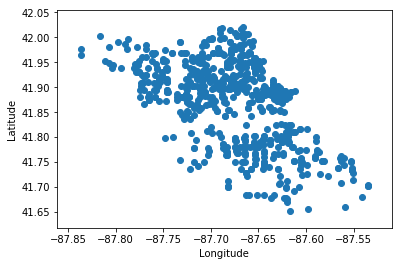

In [24]:
# Checking for any bad lat/long points
plt.scatter(liquor_df['LONGITUDE'], liquor_df['LATITUDE'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [44]:
# Checking for null values in lat/long
len(liquor_df['LATITUDE']) - len(liquor_df['LATITUDE'].dropna()), len(liquor_df['LONGITUDE']) - len(liquor_df['LONGITUDE'].dropna())

(4, 4)

In [45]:
liquor_df[(liquor_df['LATITUDE'].isnull())]

,LEGAL NAME,LATITUDE,LONGITUDE,ADDRESS
284,"THE WINE RACK, INC.",NaN,NaN,"1340 W MADISON ST BSMT, 1ST FL, MEZZ"
625,VINTAGE WINES LIMITED,NaN,NaN,2700 RIVER RD 301
654,WASHINGTON SQUARE LIQUORS INC,NaN,NaN,420 N CLARK ST 1 ST
660,"DOUBLE DOOR LIQUORS, INC.",NaN,NaN,"1572 N MILWAUKEE AVE BSMT, 1ST, MEZZANINE"


There are 4 liquor stores that are missing locations.  Using the website https://www.latlong.net/convert-address-to-lat-long.html I can convert the address to latitude/longitude. 

In [53]:
# Adding missing lat/long
liquor_df.loc[284, 'LATITUDE'] = 41.881660
liquor_df.loc[284, 'LONGITUDE'] = -87.661247

liquor_df.loc[654, 'LATITUDE'] = 41.889900
liquor_df.loc[654, 'LONGITUDE'] = -87.631360

liquor_df.loc[660, 'LATITUDE'] = 41.909918
liquor_df.loc[660, 'LONGITUDE'] = -87.677131

Vintage Wines Limited is located outside of the Chicago Area so I will delete it.  

In [56]:
# Removing bad store
liquor_df = liquor_df.drop(625)

In [58]:
# Resetting the index for liquor_df 
liquor_df = liquor_df.reset_index(drop = True)

Text(0,0.5,'Latitude')

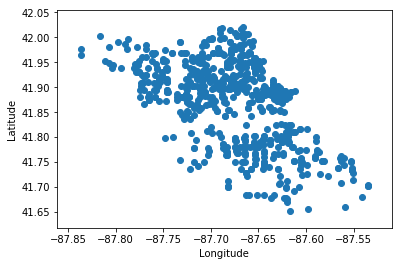

In [26]:
# Checking for any bad lat/long points
plt.scatter(liquor_df['LONGITUDE'], liquor_df['LATITUDE'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [61]:
# Saving all liquor stores to csv
liquor_df.to_csv('Liquor.csv', index = False)

## Distance from Closest Liquor Store

In [62]:
# reading crime csv
crime_df = pd.read_csv('Crimes_2001_into_2018_Cleaned.csv')

In [63]:
crime_df.head()

,ID,Date,Year,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Season,Quarter of Year,Day of the Week,Day Type,Time of Day,Day,Hour,Third of Month,Street,Holiday,Is Holiday,Closest Train Stop,Closest Train Line,Distance from Closest Train Stop (km),Closest Bus Stop,Distance from Closest Bus Stop (km)
0,10000092,2015-03-18 19:44:00,2015,047XX W OHIO ST,BATTERY,STREET,False,1111,11.0,28.0,25.0,1144606.0,1903566.0,41.891399,-87.744385,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,19,T2,W OHIO ST,No Holiday,False,Cicero,Green Line,0.54,Cicero & Ohio,0.10
1,10000094,2015-03-18 23:00:00,2015,066XX S MARSHFIELD AVE,OTHER OFFENSE,STREET,False,725,7.0,15.0,67.0,1166468.0,1860715.0,41.773372,-87.665319,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,23,T2,S MARSHFIELD AVE,No Holiday,False,Ashland/63rd,Green Line,0.62,Ashland & 66th Street,0.12
2,10000095,2015-03-18 22:45:00,2015,044XX S LAKE PARK AVE,BATTERY,APARTMENT,True,222,2.0,4.0,39.0,1185075.0,1875622.0,41.813861,-87.596643,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,22,T2,S LAKE PARK AVE,No Holiday,False,43rd,Green Line,1.88,Oakenwald & 43rd Street,0.35
3,10000096,2015-03-18 22:30:00,2015,051XX S MICHIGAN AVE,BATTERY,APARTMENT,False,225,2.0,3.0,40.0,1178033.0,1870804.0,41.800802,-87.622619,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,22,T2,S MICHIGAN AVE,No Holiday,False,51st,Green Line,0.37,51st Street & Michigan,0.13
4,10000097,2015-03-18 21:00:00,2015,047XX W ADAMS ST,ROBBERY,SIDEWALK,False,1113,11.0,28.0,25.0,1144920.0,1898709.0,41.878065,-87.743354,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,21,T2,W ADAMS ST,No Holiday,False,Cicero,Blue Line,0.74,Jackson & Kilpatrick,0.13


In [64]:
# Creating a temporary dataframe with non-null entries of latitude and longitude
crime_df_notnull = crime_df[pd.notnull(crime_df['Latitude'])]

# Resetting the index for crime_df_notnull before moving on
crime_df_notnull = crime_df_notnull.reset_index(drop = True)

In [65]:
liquor_df.head()

,LEGAL NAME,LATITUDE,LONGITUDE,ADDRESS
0,"FLICKINGER FINE WINE, INC.",41.859977,-87.637946,1600 S STEWART AVE 5TH & BSMT
1,"DANNY'S LIQUORS, INC.",41.935989,-87.718982,3018 N MILWAUKEE AVE 1ST
2,ALTGELD GARDEN LIQUOR INC,41.656753,-87.597599,13118 S ELLIS AVE 1ST
3,"ASHLAND LIQUORS, INC.",41.896199,-87.666257,1532 W CHICAGO AVE 1ST
4,"GREEN OAK FOOD & LIQUOR, INC.",41.900361,-87.643236,956 N LARRABEE ST


In [66]:
# Converting the liquor store coordinates to radians and zipping them together 
liquor = list(zip(np.deg2rad(liquor_df['LATITUDE']), np.deg2rad(liquor_df['LONGITUDE'])))

# The BallTree is created using the liquor store coordinates
tree = BallTree(liquor, metric = DistanceMetric.get_metric('haversine'))

# Converting the crime coordinates to radians and zipping them together
crime = list(zip(np.deg2rad(crime_df_notnull['Latitude']), np.deg2rad(crime_df_notnull['Longitude'])))

In [67]:
# Finding the closest liquor store for each crime - split into 2 to speed up
dists, ind = tree.query(crime[0:3333088], k=1) # returns distance and index of nearest liquor store
dists2, ind2 = tree.query(crime[3333088:], k=1) 

In [68]:
# Combining dists and ind
dists_all = np.vstack([dists, dists2])
ind_all = np.vstack([ind, ind2])

# Extracting the nearest liquor store name from ind_all
index_liq = list(ind_all[:,0])
name_liq = list(liquor_df['LEGAL NAME'][index_liq])

# Extracting the distance from the nearest liquor store from dists_all and converting from radians to km
distances_liq = list((dists_all[:,0] * 6371).round(2))

In [69]:
len(distances_liq) - len(crime_df_notnull)

0

In [70]:
# Creating new columns
crime_df_notnull['Closest Liquor Store'] = name_liq
crime_df_notnull['Distance from Closest Liquor Store (km)'] = distances_liq

In [71]:
crime_df_notnull.head()

,ID,Date,Year,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Season,Quarter of Year,Day of the Week,Day Type,Time of Day,Day,Hour,Third of Month,Street,Holiday,Is Holiday,Closest Train Stop,Closest Train Line,Distance from Closest Train Stop (km),Closest Bus Stop,Distance from Closest Bus Stop (km),Closest Liquor Store,Distance from Closest Liquor Store (km)
0,10000092,2015-03-18 19:44:00,2015,047XX W OHIO ST,BATTERY,STREET,False,1111,11.0,28.0,25.0,1144606.0,1903566.0,41.891399,-87.744385,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,19,T2,W OHIO ST,No Holiday,False,Cicero,Green Line,0.54,Cicero & Ohio,0.10,MAZE FOOD & LIQUOR INC,0.10
1,10000094,2015-03-18 23:00:00,2015,066XX S MARSHFIELD AVE,OTHER OFFENSE,STREET,False,725,7.0,15.0,67.0,1166468.0,1860715.0,41.773372,-87.665319,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,23,T2,S MARSHFIELD AVE,No Holiday,False,Ashland/63rd,Green Line,0.62,Ashland & 66th Street,0.12,"BIG SAM'S FOOD & LIQUOR, INC.",0.53
2,10000095,2015-03-18 22:45:00,2015,044XX S LAKE PARK AVE,BATTERY,APARTMENT,True,222,2.0,4.0,39.0,1185075.0,1875622.0,41.813861,-87.596643,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,22,T2,S LAKE PARK AVE,No Holiday,False,43rd,Green Line,1.88,Oakenwald & 43rd Street,0.35,"ONE STOP FOOD & LIQUOR STORE, INC.",0.37
3,10000096,2015-03-18 22:30:00,2015,051XX S MICHIGAN AVE,BATTERY,APARTMENT,False,225,2.0,3.0,40.0,1178033.0,1870804.0,41.800802,-87.622619,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,22,T2,S MICHIGAN AVE,No Holiday,False,51st,Green Line,0.37,51st Street & Michigan,0.13,51ST EXPRESS FOOD & LIQUOR INC,0.15
4,10000097,2015-03-18 21:00:00,2015,047XX W ADAMS ST,ROBBERY,SIDEWALK,False,1113,11.0,28.0,25.0,1144920.0,1898709.0,41.878065,-87.743354,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,21,T2,W ADAMS ST,No Holiday,False,Cicero,Blue Line,0.74,Jackson & Kilpatrick,0.13,"NIJAR FOOD & LIQUOR, INC.",0.70


In [72]:
crime_df_notnull.columns

Index(['ID', 'Date', 'Year', 'Block', 'Primary Type', 'Location Description',
       'Domestic', 'Beat', 'District', 'Ward', 'Community', 'X Coordinate',
       'Y Coordinate', 'Latitude', 'Longitude', 'Month', 'Season',
       'Quarter of Year', 'Day of the Week', 'Day Type', 'Time of Day', 'Day',
       'Hour', 'Third of Month', 'Street', 'Holiday', 'Is Holiday',
       'Closest Train Stop', 'Closest Train Line',
       'Distance from Closest Train Stop (km)', 'Closest Bus Stop',
       'Distance from Closest Bus Stop (km)', 'Closest Liquor Store',
       'Distance from Closest Liquor Store (km)'],
      dtype='object')

In [73]:
# Joining crime_df_notnull with crime_df
crime_df2 = pd.merge(crime_df, crime_df_notnull[['ID', 'Closest Liquor Store',
       'Distance from Closest Liquor Store (km)']], left_on = 'ID', right_on = 'ID', how = 'left')

In [74]:
crime_df2.head()

,ID,Date,Year,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Season,Quarter of Year,Day of the Week,Day Type,Time of Day,Day,Hour,Third of Month,Street,Holiday,Is Holiday,Closest Train Stop,Closest Train Line,Distance from Closest Train Stop (km),Closest Bus Stop,Distance from Closest Bus Stop (km),Closest Liquor Store,Distance from Closest Liquor Store (km)
0,10000092,2015-03-18 19:44:00,2015,047XX W OHIO ST,BATTERY,STREET,False,1111,11.0,28.0,25.0,1144606.0,1903566.0,41.891399,-87.744385,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,19,T2,W OHIO ST,No Holiday,False,Cicero,Green Line,0.54,Cicero & Ohio,0.10,MAZE FOOD & LIQUOR INC,0.10
1,10000094,2015-03-18 23:00:00,2015,066XX S MARSHFIELD AVE,OTHER OFFENSE,STREET,False,725,7.0,15.0,67.0,1166468.0,1860715.0,41.773372,-87.665319,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,23,T2,S MARSHFIELD AVE,No Holiday,False,Ashland/63rd,Green Line,0.62,Ashland & 66th Street,0.12,"BIG SAM'S FOOD & LIQUOR, INC.",0.53
2,10000095,2015-03-18 22:45:00,2015,044XX S LAKE PARK AVE,BATTERY,APARTMENT,True,222,2.0,4.0,39.0,1185075.0,1875622.0,41.813861,-87.596643,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,22,T2,S LAKE PARK AVE,No Holiday,False,43rd,Green Line,1.88,Oakenwald & 43rd Street,0.35,"ONE STOP FOOD & LIQUOR STORE, INC.",0.37
3,10000096,2015-03-18 22:30:00,2015,051XX S MICHIGAN AVE,BATTERY,APARTMENT,False,225,2.0,3.0,40.0,1178033.0,1870804.0,41.800802,-87.622619,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,22,T2,S MICHIGAN AVE,No Holiday,False,51st,Green Line,0.37,51st Street & Michigan,0.13,51ST EXPRESS FOOD & LIQUOR INC,0.15
4,10000097,2015-03-18 21:00:00,2015,047XX W ADAMS ST,ROBBERY,SIDEWALK,False,1113,11.0,28.0,25.0,1144920.0,1898709.0,41.878065,-87.743354,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,21,T2,W ADAMS ST,No Holiday,False,Cicero,Blue Line,0.74,Jackson & Kilpatrick,0.13,"NIJAR FOOD & LIQUOR, INC.",0.70


In [77]:
# Saving crime_df2 to csv
crime_df2.to_csv('Crimes_2001_into_2018_Cleaned.csv', index = False)